## Dataset Preparation - Jan-June 2022:

In [105]:
#Importations of libraries needed:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy import stats
from sklearn.preprocessing import StandardScaler

In [106]:
#Import dataset as dataframe:
df = pd.read_csv('../Datasets/TrafficFlow/Traffic_Flow_Data_Jan_to_June_2022_SDCC.csv')
print("The data contains {0} rows and {1} columns".format(df.shape[0], df.shape[1]))
df.head(20)

The data contains 1048575 rows and 12 columns


,site,day,date,start_time,end_time,flow,flow_pc,cong,cong_pc,dsat,dsat_pc,ObjectId
0,N01111A,TU,04/01/2022,2022/11/07 03:00:00+00,03:15,13,100,0,100,0,0,1
1,N01111A,TU,04/01/2022,2022/11/07 03:15:00+00,03:30,10,100,0,100,0,0,2
2,N01111A,TU,04/01/2022,2022/11/07 03:30:00+00,03:45,0,100,0,100,0,0,3
3,N01111A,TU,04/01/2022,2022/11/07 03:45:00+00,04:00,9,100,0,100,0,0,4
4,N01111A,TU,04/01/2022,2022/11/07 04:00:00+00,04:15,0,100,0,100,0,0,5
5,N01111A,TU,04/01/2022,2022/11/07 04:15:00+00,04:30,3,100,0,100,0,0,6
6,N01111A,TU,04/01/2022,2022/11/07 04:30:00+00,04:45,19,100,0,100,1,39,7
7,N01111A,TU,04/01/2022,2022/11/07 04:45:00+00,05:00,9,100,0,100,1,26,8
8,N01111A,TU,04/01/2022,2022/11/07 05:00:00+00,05:15,7,100,0,100,0,0,9
9,N01111A,TU,04/01/2022,2022/11/07 05:15:00+00,05:30,19,100,0,100,0,0,10


##### First we need to identify potential data quality issues, and then propose solutions for each
##### Potential data quality issues: `Duplicates`, `Datatypes`, `Missing Data` and `Outliers`

#### `Duplicates`:

In [107]:
df[df.duplicated()].shape[0]

0

#### `Datatypes`:

In [108]:
df.dtypes

site          object
day           object
date          object
start_time    object
end_time      object
flow           int64
flow_pc        int64
cong           int64
cong_pc        int64
dsat           int64
dsat_pc        int64
ObjectId       int64
dtype: object

##### We can see that all categorical data is represented by the `object` class, and all numerical data is represetned by the `int64` class, which is fine for now. We may need to make slight adjustments later

#### `Missing data`:

In [109]:
print("The number of missing values in the whole dataset is {0}".format(df.isnull().sum().sum()))
print("The percentage of entries with missing data in each column is:")
100 * (df.isnull().sum()/df.shape[0])

The number of missing values in the whole dataset is 0
The percentage of entries with missing data in each column is:


site          0.0
day           0.0
date          0.0
start_time    0.0
end_time      0.0
flow          0.0
flow_pc       0.0
cong          0.0
cong_pc       0.0
dsat          0.0
dsat_pc       0.0
ObjectId      0.0
dtype: float64

##### As we can see, thankfully this dataset contains no missing data, so there is no need for any imputation or deletion etc
#
#
#

#### `Outliers`:

#### Deciding how to treat outliers in our dataset depends on various factors, including the nature of your data, the goals of our analysis, and the reasons behind the presence of outliers.

### Consider the Nature of the Data:

1. **Understanding Outliers:**
   - Consider whether the outliers are genuine data points or if they are the result of errors, data entry mistakes, or measurement errors. Genuine extreme values might carry important information.

2. **Data Distribution:**
   - Assess the overall distribution of the data. If the data is non-parametric or exhibits heavy tails, outliers might be a natural part of the distribution.

### Consider the Analysis Goals:

1. **Impact on Results:**
   - Evaluate how the presence of outliers affects the results of the analysis. Outliers can significantly impact measures like mean and standard deviation, so removing them may alter the interpretation of the data.

2. **Model Assumptions:**
   - If we are going to be fitting statistical models, check if the assumptions of the models are violated by the presence of outliers. Some models assume a normal distribution, and outliers might affect the model's performance.

### Outlier Handling Strategies:

1. **Transformation:**
   - We should consider transforming the data (e.g., log transformation) to make the distribution more normal, reducing the impact of outliers without removing them.

2. **Winsorizing:**
   - Apply winsorizing to cap extreme values by replacing them with values at a specified percentile. This can mitigate the impact of outliers while retaining the information they provide.

3. **Imputation:**
   - If the outliers are due to data entry errors, consider imputing them with more reasonable values rather than removing them.

### Impact on Sample Size:

1. **Sample Size:**
   - Removing outliers reduces the size of the dataset. Consider the impact of this reduction on the statistical power of your analysis.

2. **Representativeness:**
   - Ensure that the remaining dataset is still representative of the population we are studying after removing outliers.

### Consult with Domain Experts:

1. **Domain Knowledge:**
   - Consult with experts in the field related to the data, in this case traffic congestion. They may provide insights into whether certain values are plausible or whether outliers should be retained.

### Robust Statistical Methods:

1. **Use Robust Measures:**
   - Utilize robust statistical measures (e.g., median instead of mean) that are less sensitive to outliers.

### Document My Decision:

1. **Documentation:**
   - It is important to clearly document the reasons behind my decision to either keep or remove outliers. This documentation is crucial for transparency and reproducibility.

#### In summary, the decision to remove outliers depends on a careful consideration of the characteristics of the data, the goals of my analysis, and the potential impact on the final results. It's often beneficial to explore multiple strategies, document decisions, and be aware of the implications of outlier handling on the validity of my analysis.

#### Box Plots

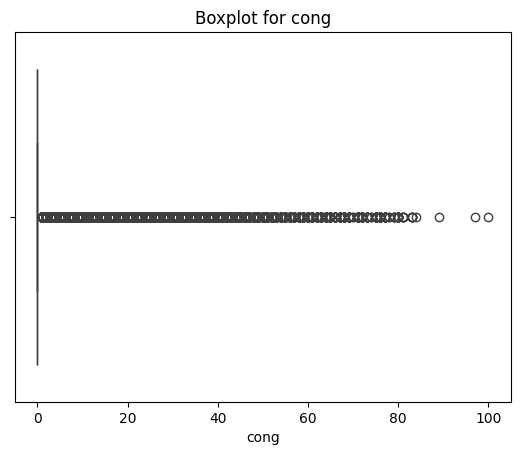

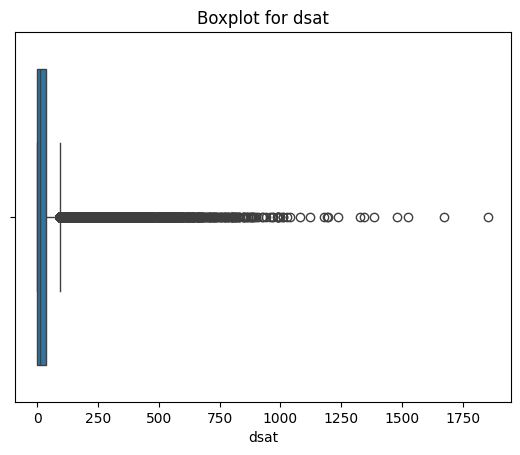

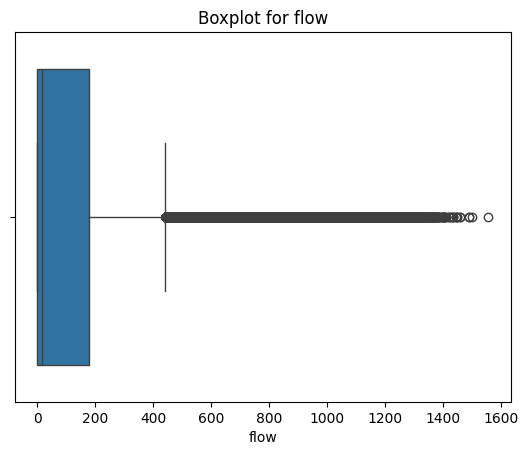

In [110]:
selected_columns = {'flow', 'cong', 'dsat'} #Only relevant columns to check for outliers in
# Iterate through relevant columns
for column_name in selected_columns:
    # Check if the column data type is int64
    if df[column_name].dtype == 'int64':
        # Create a boxplot for the column
        sns.boxplot(x=df[column_name])
        plt.title(f'Boxplot for {column_name}')
        plt.show()

#### Scatter Plots

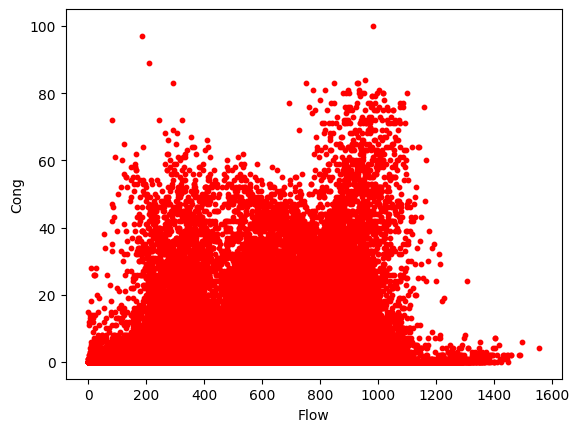

In [111]:
plt.scatter(df['flow'], df['cong'], color='red', s=10)
plt.xlabel('Flow')
plt.ylabel('Cong')
plt.show()

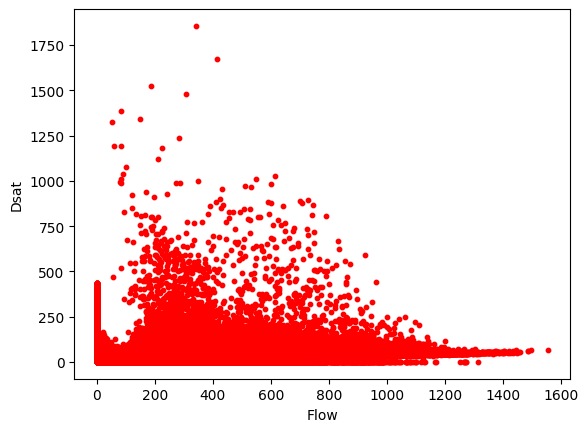

In [112]:
plt.scatter(df['flow'], df['dsat'], color='red', s=10)
plt.xlabel('Flow')
plt.ylabel('Dsat')
plt.show()

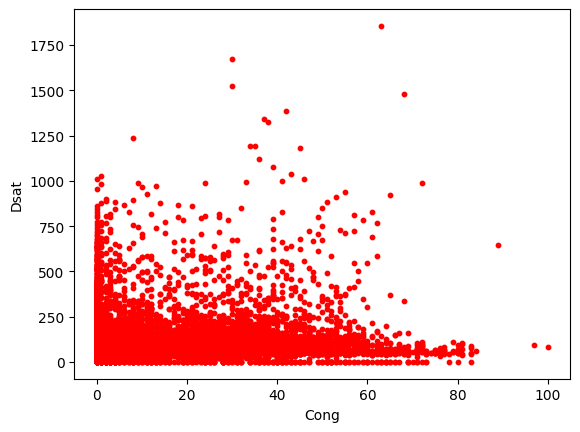

In [113]:
plt.scatter(df['cong'], df['dsat'], color='red', s=10)
plt.xlabel('Cong')
plt.ylabel('Dsat')
plt.show()

#### Distribution

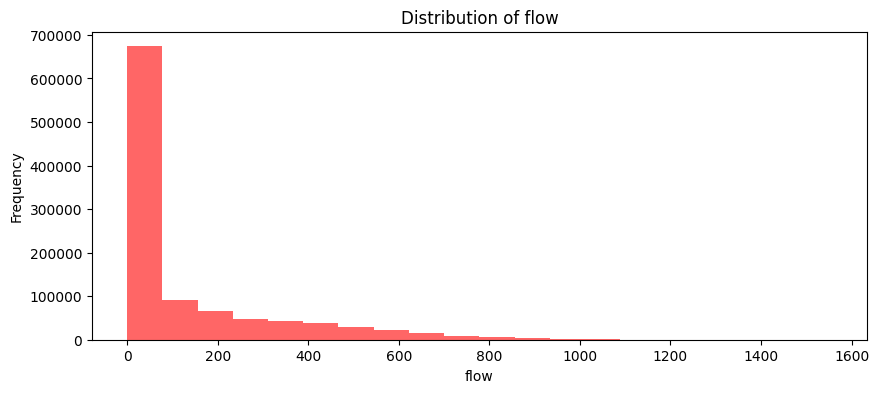

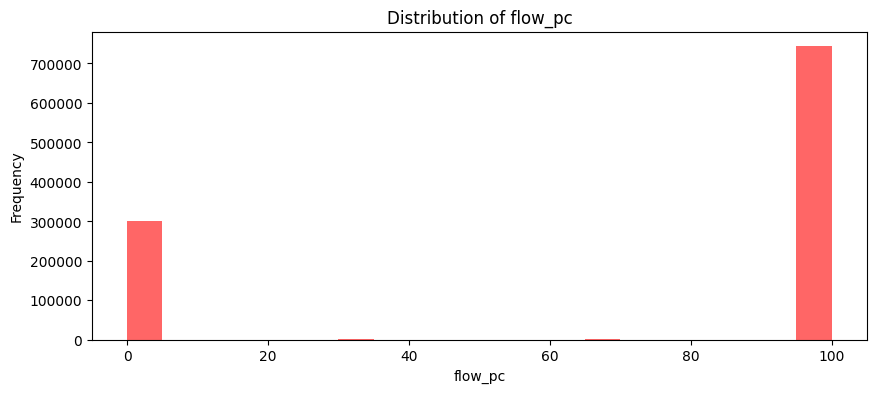

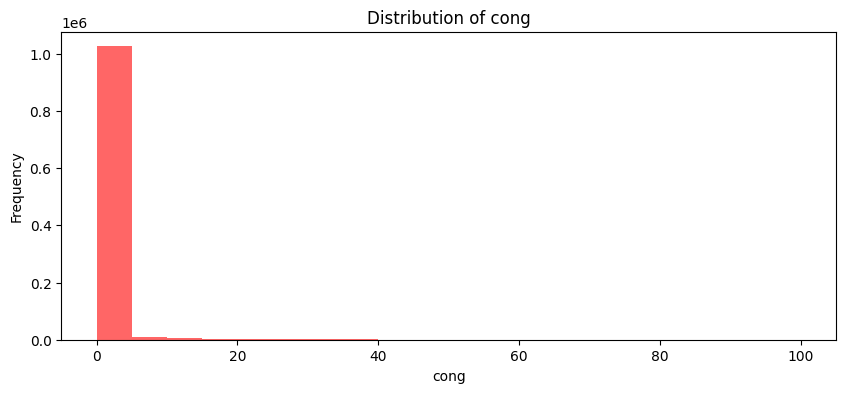

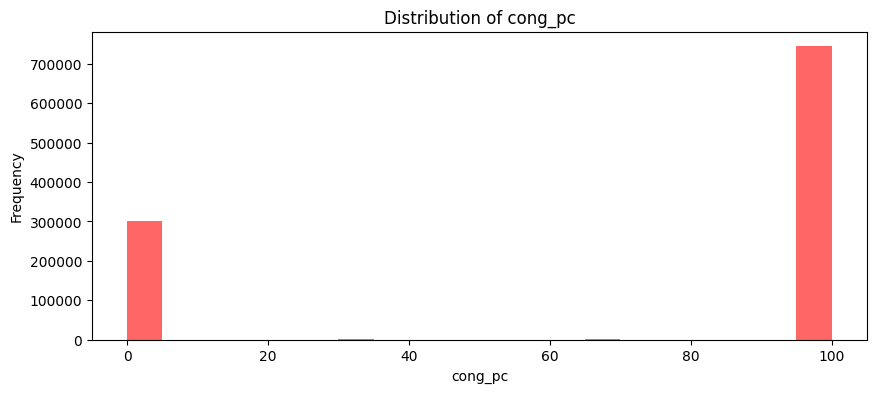

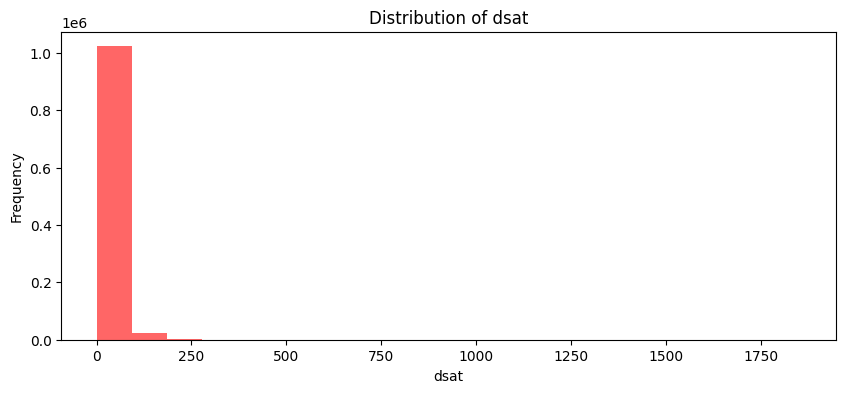

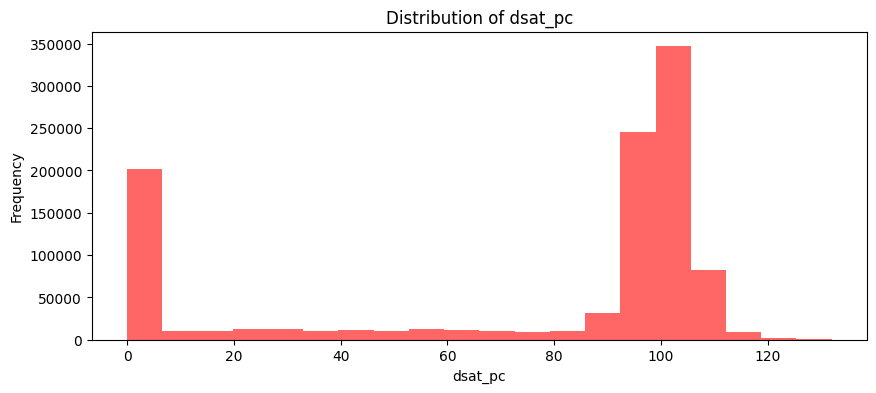

In [114]:
numeric_cols = df.select_dtypes(include='number').columns
numeric_cols = [col for col in numeric_cols if col != 'ObjectId']
for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    plt.hist(df[col], bins=20, color='r', alpha=0.6)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')
    plt.show()

#### Descriptive Statistics

In [115]:
# Filter columns of type int64
int64_columns = df.select_dtypes(include='int64').columns

# Print the describe for each int64 column
for column in int64_columns:
    print(df[column].describe())

count    1.048575e+06
mean     1.248179e+02
std      1.988056e+02
min      0.000000e+00
25%      0.000000e+00
50%      1.700000e+01
75%      1.770000e+02
max      1.556000e+03
Name: flow, dtype: float64
count    1.048575e+06
mean     7.113167e+01
std      4.522154e+01
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+02
75%      1.000000e+02
max      1.000000e+02
Name: flow_pc, dtype: float64
count    1.048575e+06
mean     4.380135e-01
std      3.116113e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+02
Name: cong, dtype: float64
count    1.048575e+06
mean     7.113167e+01
std      4.522154e+01
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+02
75%      1.000000e+02
max      1.000000e+02
Name: cong_pc, dtype: float64
count    1.048575e+06
mean     2.253687e+01
std      3.188682e+01
min      0.000000e+00
25%      0.000000e+00
50%      9.000000e+00
75%      3.700000e+01
max      1.856000e+03
Name: 

In [116]:
df.describe()

,flow,flow_pc,cong,cong_pc,dsat,dsat_pc,ObjectId
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.248179e+02,7.113167e+01,4.380135e-01,7.113167e+01,2.253687e+01,7.404448e+01,5.242880e+05
std,1.988056e+02,4.522154e+01,3.116113e+00,4.522154e+01,3.188682e+01,4.116030e+01,3.026977e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.200000e+01,2.621445e+05
50%,1.700000e+01,1.000000e+02,0.000000e+00,1.000000e+02,9.000000e+00,9.800000e+01,5.242880e+05
75%,1.770000e+02,1.000000e+02,0.000000e+00,1.000000e+02,3.700000e+01,1.010000e+02,7.864315e+05
max,1.556000e+03,1.000000e+02,1.000000e+02,1.000000e+02,1.856000e+03,1.320000e+02,1.048575e+06


#### Z Score

In [117]:
# Filter numeric columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Array to store the number of outliers for each column
outliers_count = []

# Identify outliers for each numeric column
for column in numeric_columns:
    z_scores = zscore(df[column])
    outliers = (z_scores > 3) | (z_scores < -3)

    # Store the number of outliers for the current column
    outliers_count.append((column, outliers.sum()))
    
    print(f"Outliers for {column}:")
    print(df[outliers][column])
    print("\n")

# Print or use the outliers_count array as needed
print("Number of outliers for each column:")
print(outliers_count)

Outliers for flow:
16         1021
2766        763
3145        896
3438        743
3855        798
           ... 
1035622     743
1036125     775
1036546     728
1036916     746
1036917     738
Name: flow, Length: 19610, dtype: int64


Outliers for flow_pc:
Series([], Name: flow_pc, dtype: int64)


Outliers for cong:
4484       14
9612       10
10586      11
11318      12
12687      16
           ..
1047905    42
1047906    18
1048029    15
1048115    15
1048271    16
Name: cong, Length: 13807, dtype: int64


Outliers for cong_pc:
Series([], Name: cong_pc, dtype: int64)


Outliers for dsat:
18480      187
18737      141
18753      123
18852      133
19079      236
          ... 
1048085    134
1048142    157
1048243    121
1048271    121
1048306    164
Name: dsat, Length: 9075, dtype: int64


Outliers for dsat_pc:
Series([], Name: dsat_pc, dtype: int64)


Outliers for ObjectId:
Series([], Name: ObjectId, dtype: int64)


Number of outliers for each column:
[('flow', 19610), ('flow_pc',

#### There are many outliers in `flow` (19610), `cong` (13807) and `dsat` (9075). Lets check if any of these outliers overlap

In [118]:
# Create a DataFrame with only the rows that are outliers in any column
outliers_df = df[df[numeric_columns].isin(outliers).any(axis=1)]

# Check for duplicate rows in the outliers DataFrame
duplicate_outliers = outliers_df[outliers_df.duplicated()]

# Print or use the duplicate_outliers DataFrame as needed
print("Duplicate outliers:")
print(duplicate_outliers)

Duplicate outliers:
Empty DataFrame
Columns: [site, day, date, start_time, end_time, flow, flow_pc, cong, cong_pc, dsat, dsat_pc, ObjectId]
Index: []


#### It seems that there are no duplicate outliers, meaning that each row identified as an outlier is unique and doesn't appear as an outlier in more than one column. This is a good sign, as it suggests that the outliers identified in different columns are distinct and not overlapping. 

#### If there were rows in the `duplicate_outliers` DataFrame, it would indicate that those specific data points are outliers in multiple columns. The fact that the DataFrame is empty suggests that each row is an outlier in only one of the columns considered for outlier detection

#
#
#
#
#
#

## Correlation

#### Now let us view the correlation between each numerical feature in the dataset using a heat map to allow us to identify the relationships between each feature. Heatmaps are particularly useful for correlation analysis, idetifying patterns and trends, feature comparison, identifying outliers, easy interpretation, especially for larger datasets, which ours is

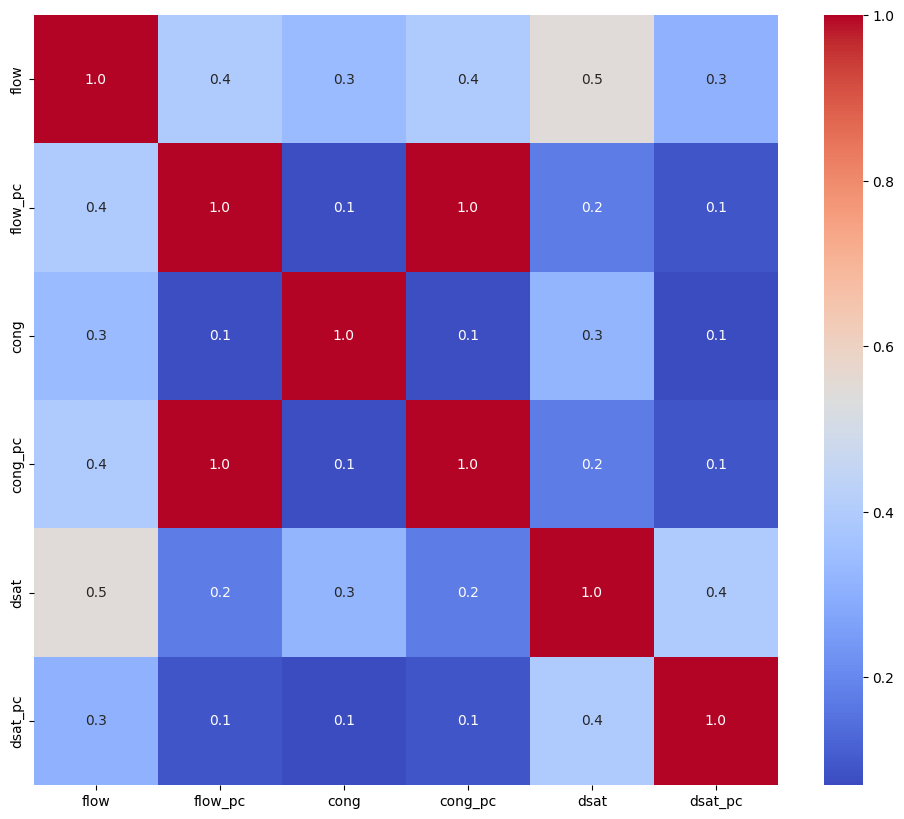

In [119]:
# Select only numerical columns (excluding ObjectId)
numeric_columns = df.select_dtypes(include='int64').drop(columns=['ObjectId'])

# Generate a correlation matrix
correlation_matrix = numeric_columns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")

# Show the plot
plt.show()

### Outlier Analysis:

1. **Understanding Outliers:**
   - To my understanding there are datapoints that are the result of errors, data entry mistakes, or measurement errors. Genuine extreme values might carry important information.

2. **Data Distribution:**
   - Could you class the data is non-parametric or exhibits heavy tails? Then outliers might be a natural part of the distribution.

### Consider the Analysis Goals:

1. **Impact on Results:**
   - Evaluate how the presence of outliers affects the results of the analysis. Outliers can significantly impact measures like mean and standard deviation, so removing them may alter the interpretation of the data.

2. **Model Assumptions:**
   - If we are going to be fitting statistical models, check if the assumptions of the models are violated by the presence of outliers. Some models assume a normal distribution, and outliers might affect the model's performance.
   - Support Vector Machines, KNN, Robust Activation Function Neural Networks

### Outlier Handling Strategies:

1. **Transformation:**
   - We should consider transforming the data (e.g., log transformation) to make the distribution more normal, reducing the impact of outliers without removing them.

2. **Winsorizing:**
   - Apply winsorizing to cap extreme values by replacing them with values at a specified percentile. This can mitigate the impact of outliers while retaining the information they provide.

3. **Imputation:**
   - If the outliers are due to data entry errors, consider imputing them with more reasonable values rather than removing them.

### Impact on Sample Size:

1. **Sample Size:**
   - Removing outliers reduces the size of the dataset. Consider the impact of this reduction on the statistical power of your analysis.
   - Huge dataset, not an issue?

2. **Representativeness:**
   - Ensure that the remaining dataset is still representative of the population we are studying after removing outliers.

### Consult with Domain Experts:

1. **Domain Knowledge:**
   - Consult with experts in the field related to the data, in this case traffic congestion. They may provide insights into whether certain values are plausible or whether outliers should be retained.


### Drop outliers based on Z-Score

In [120]:
# Calculate the Z scores of each column
z_scores = stats.zscore(df.select_dtypes(include=[float, int]))

# Get absolute Z scores
abs_z_scores = abs(z_scores)

# Identify outliers (True for rows containing outliers)
outliers = (abs_z_scores > 3).any(axis=1)

# Count the number of outliers
num_outliers = outliers.sum()

# Filter the DataFrame to remove outliers
df_no_outliers = df[~outliers]

# Verification
original_size = df.shape[0]
new_size = df_no_outliers.shape[0]
outliers_removed = original_size - new_size

print(f"Original DataFrame size: {original_size} rows")
print(f"DataFrame size after removing outliers: {new_size} rows")
print(f"Number of outliers detected and removed: {num_outliers}")

# Ensure the numbers match
assert outliers_removed == num_outliers, "Mismatch in the number of outliers removed"

# df_no_outliers now contains the DataFrame without outliers (switch)
df = df_no_outliers

Original DataFrame size: 1048575 rows
DataFrame size after removing outliers: 1013718 rows
Number of outliers detected and removed: 34857


#### Drop the PC columns, the smoothed average is useless to us because it does not provide additional data

In [121]:
df = df.drop(columns=['flow_pc', 'cong_pc', 'dsat_pc'])

In [122]:
df.head(5)

,site,day,date,start_time,end_time,flow,cong,dsat,ObjectId
0,N01111A,TU,04/01/2022,2022/11/07 03:00:00+00,03:15,13,0,0,1
1,N01111A,TU,04/01/2022,2022/11/07 03:15:00+00,03:30,10,0,0,2
2,N01111A,TU,04/01/2022,2022/11/07 03:30:00+00,03:45,0,0,0,3
3,N01111A,TU,04/01/2022,2022/11/07 03:45:00+00,04:00,9,0,0,4
4,N01111A,TU,04/01/2022,2022/11/07 04:00:00+00,04:15,0,0,0,5


In [123]:
# Check the current mean and standard deviation
for column in ['cong', 'flow', 'dsat']:
    mean = df[column].mean()
    std = df[column].std()
    print(f"{column}: Mean = {mean:.6f}, Standard Deviation = {std:.6f}")

cong: Mean = 0.113485, Standard Deviation = 0.675736
flow: Mean = 106.242485, Standard Deviation = 166.787493
dsat: Mean = 20.000720, Standard Deviation = 25.123772


#### Now we should normalise / standardise the data the data

In [124]:
def showDistribution(dataframe):
    numeric_cols = dataframe.select_dtypes(include='number').columns
    numeric_cols = [col for col in numeric_cols if col != 'ObjectId']
    for col in numeric_cols:
        plt.figure(figsize=(10, 4))
        plt.hist(df[col], bins=30, color='r', alpha=0.6)
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.title(f'Distribution of {col}')
        plt.show()

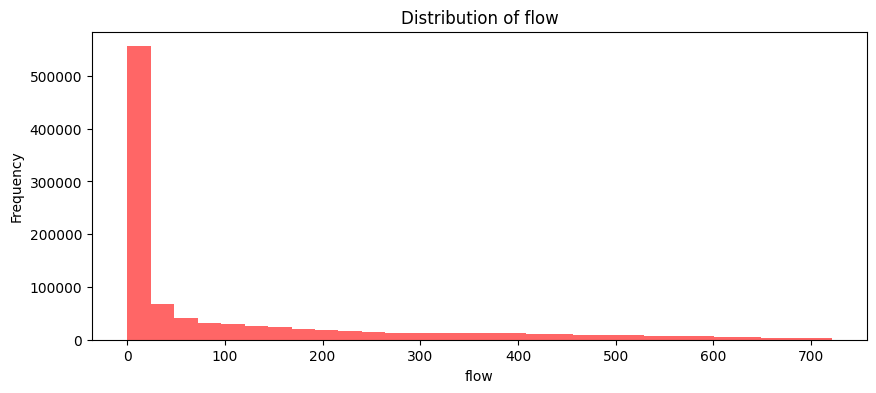

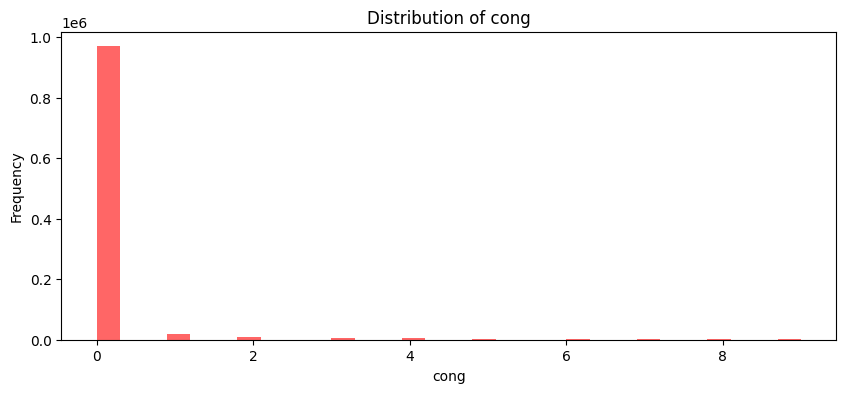

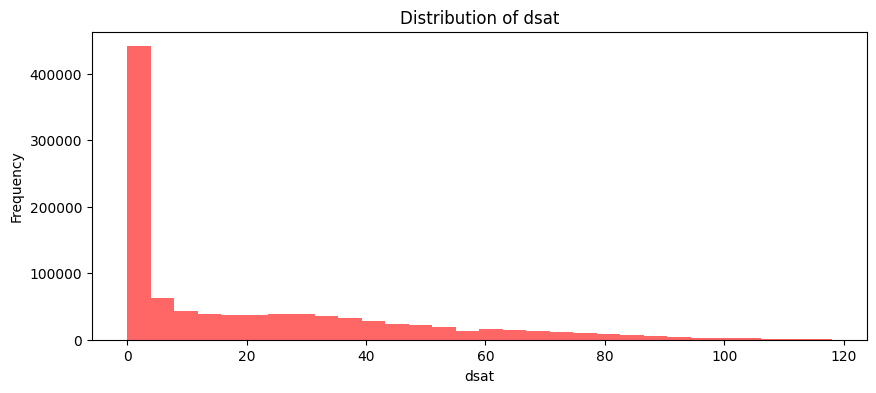

In [125]:
showDistribution(df)

#### Lets remove values that are of no use to us (we are prediciting flow, congestion and dsat, so values where they are low are of no use)

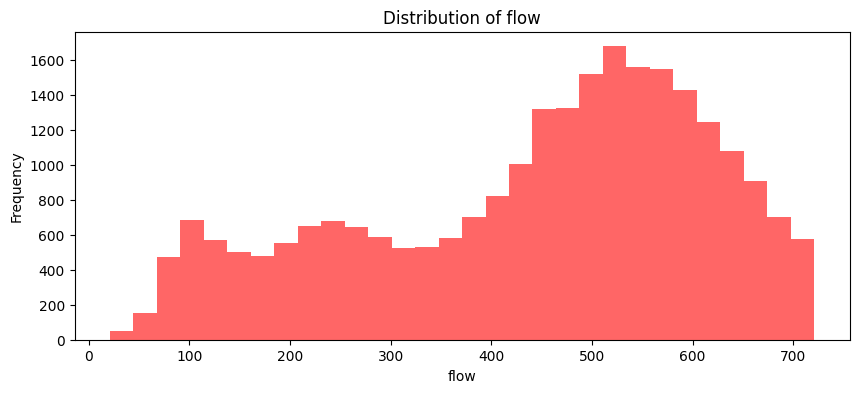

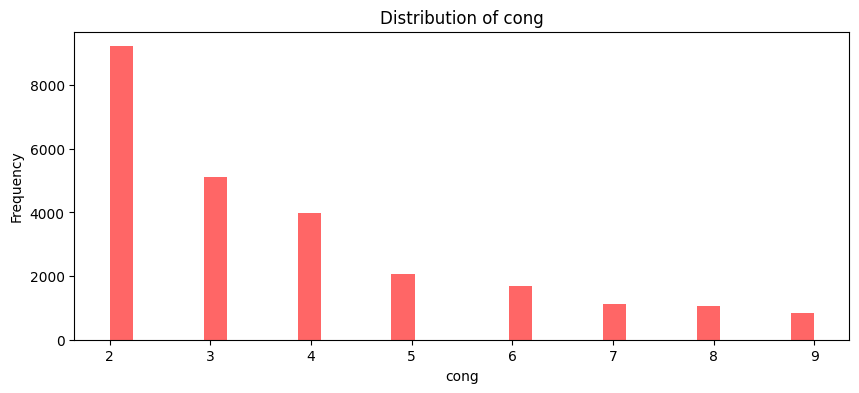

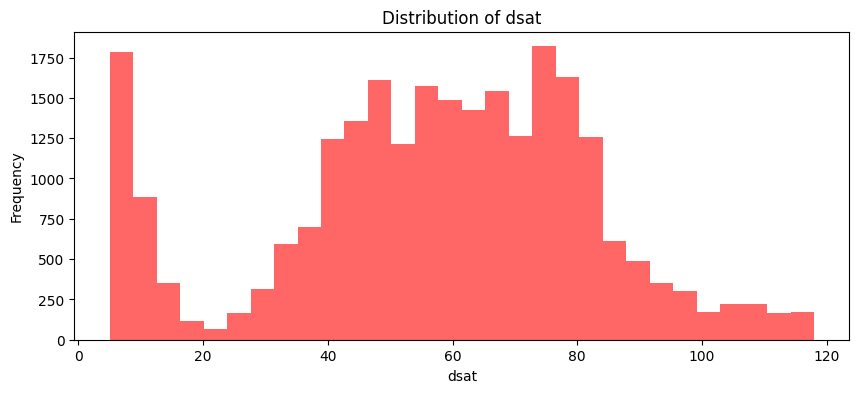

In [126]:
df = df[(df['flow'] < 0) | (df['flow'] > 20)]
df = df[(df['cong'] < 0) | (df['cong'] > 1)]
df = df[(df['dsat'] < 0) | (df['dsat'] > 4)]
showDistribution(df)

#### Log Transformation: Since the data is right-skewed, applying a log transformation can help reduce the skewness. This transformation is particularly effective for handling data that spans several orders of magnitude and can make the distribution more symmetric. However, log transformation can only be applied to positive values. Lets first verify this is not the case

In [127]:
# Select only the numerical columns of the DataFrame
numerical_df = df.select_dtypes(include=[np.number])

# Check if there are any negative values in the numerical columns
has_negative_values = (numerical_df < 0).any()

# Print the result for each numerical column
for column, has_negative in has_negative_values.items():
    print(f"Are there negative values in '{column}'? {has_negative}")


Are there negative values in 'flow'? False
Are there negative values in 'cong'? False
Are there negative values in 'dsat'? False
Are there negative values in 'ObjectId'? False


In [128]:
# Define the function to apply a log transformation safely
def safe_log_transform(column):
    # Add a small constant to shift all values to the positive domain
    return np.log(column + 1)  # Adding 1 to avoid log(0)

# Apply the log transformation to the specified columns
df['cong'] = safe_log_transform(df['cong'])
df['flow'] = safe_log_transform(df['flow'])
df['dsat'] = safe_log_transform(df['dsat'])

# Now, df['cong'], df['flow'], and df['dsat'] have been transformed.

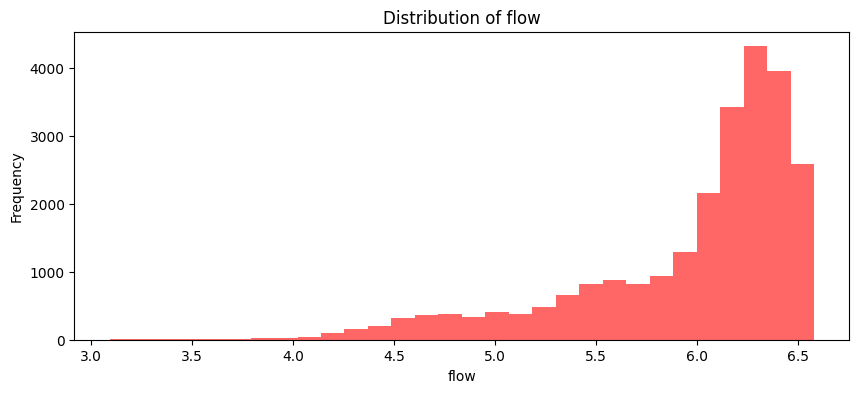

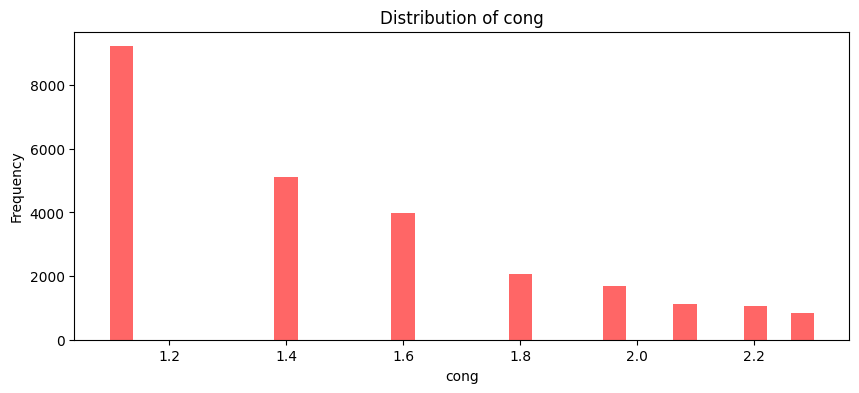

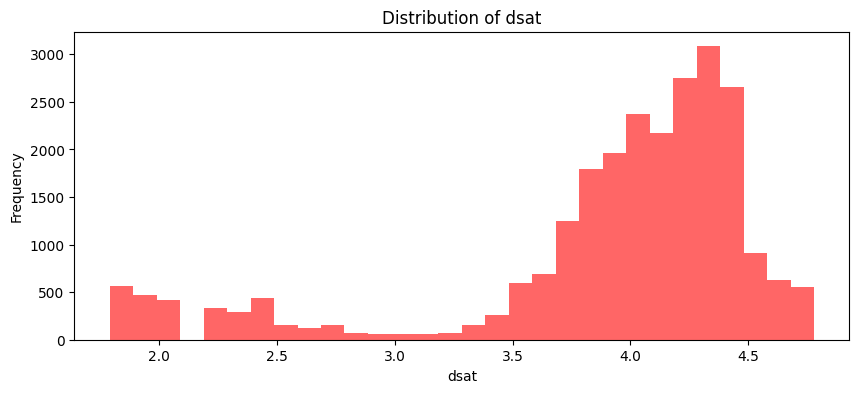

In [129]:
showDistribution(df)

In [130]:
# Check the current mean and standard deviation
for column in ['cong', 'flow', 'dsat']:
    mean = df[column].mean()
    std = df[column].std()
    print(f"{column}: Mean = {mean:.6f}, Standard Deviation = {std:.6f}")

cong: Mean = 1.482949, Standard Deviation = 0.375093
flow: Mean = 5.974382, Standard Deviation = 0.555518
dsat: Mean = 3.888049, Standard Deviation = 0.702816


#### Standardization (Z-score Normalization): After applying a log transformation, using standardization would make sense. It will scale the data to have a mean of 0 and a standard deviation of 1 without distorting the distance between the points as normalization might. This is important in traffic congestion data where outliers may represent critical incidents or patterns that are vital for the predictive model to learn (domain knowledge -> traffic data)

In [131]:
# Initialize the StandardScaler
scaler = StandardScaler()

# List of columns you want to standardize
columns_to_standardize = ['cong', 'flow', 'dsat']

# Fit the scaler to your data and transform the specified columns
df_standardized = df.copy()
df_standardized[columns_to_standardize] = scaler.fit_transform(df_standardized[columns_to_standardize])

# The specified columns have now been standardized.

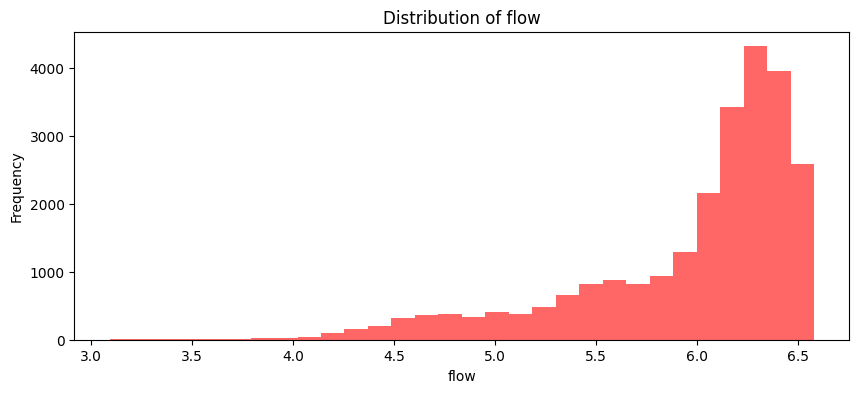

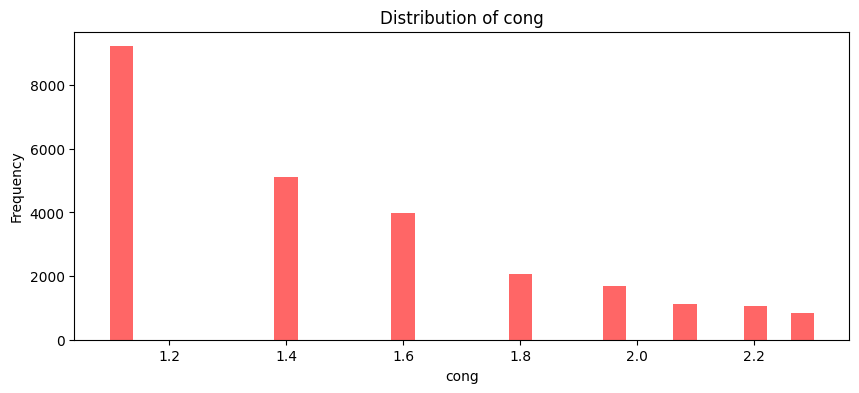

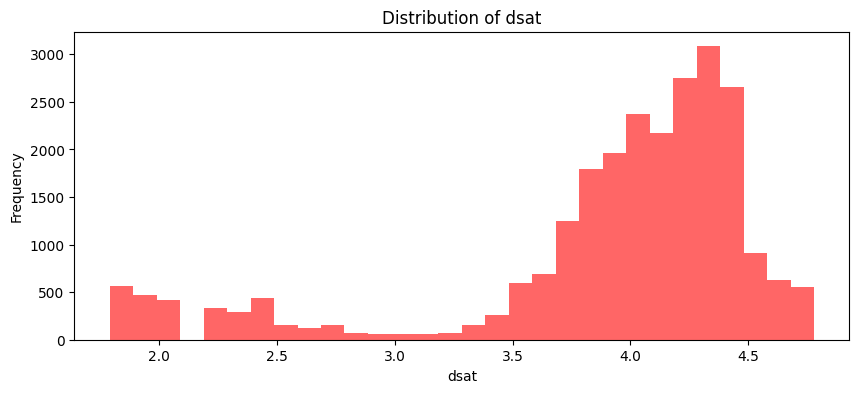

In [132]:
showDistribution(df_standardized)

In [133]:
# Verify that the mean of these features is now 0 and the standard deviation is 1
for column in ['cong', 'flow', 'dsat']:
    mean = df[column].mean()
    std = df[column].std()
    print(f"{column}: Mean = {mean:.6f}, Standard Deviation = {std:.6f}")


cong: Mean = 1.482949, Standard Deviation = 0.375093
flow: Mean = 5.974382, Standard Deviation = 0.555518
dsat: Mean = 3.888049, Standard Deviation = 0.702816


In [134]:
# Verify that the mean of these features is now 0 and the standard deviation is 1
for column in ['cong', 'flow', 'dsat']:
    mean = df_standardized[column].mean()
    std = df_standardized[column].std()
    print(f"{column}: Mean = {mean:.6f}, Standard Deviation = {std:.6f}")

cong: Mean = -0.000000, Standard Deviation = 1.000020
flow: Mean = 0.000000, Standard Deviation = 1.000020
dsat: Mean = -0.000000, Standard Deviation = 1.000020


#### Leaving the standardised dataset for now, not 100% about it...

#### Now it is time to export our prepared dataset so that it can be used for our prediciton model

In [135]:
df.to_csv('../Datasets/TrafficFlow/prepared_FlowJanJun2022.csv')